In [66]:
import numpy as np
import pandas as pd
import os
import time
import csv
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Flatten, 
                          Dense, Dropout, BatchNormalization, 
                          LeakyReLU, DepthwiseConv2D, MaxPooling2D,
                          Add, Input, Activation, GlobalAveragePooling2D,
                          Multiply, Reshape)

import cv2

from keras.utils import get_file
from keras.models import model_from_json

In [56]:
model = tf.keras.models.load_model('../04_Age_Prediction/08_models/best_model_efficientnet.h5')

In [77]:
def get_face(image_path, scale=0.1):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Load image in color mode
    img = cv2.imread(image_path, 1)
    faces = face_cascade.detectMultiScale(img, 1.1, 4)

    for (x, y, w, h) in faces:
        x_start = max(int(x - w * scale), 0)
        y_start = max(int(y - h * scale), 0)
        x_end = min(int(x + w * (1 + scale)), img.shape[1])
        y_end = min(int(y + h * (1 + scale)), img.shape[0])
        face_img = img[y_start:y_end, x_start:x_end]  # Crop the face from the image
        cv2.imwrite('cropped_face.jpg', face_img)  # Save the cropped face to an image file
        return face_img

def predict_age(model, img_path):
    img_size = (200, 200)
    face_img = get_face(img_path)
    if face_img is None:
        print("No face detected in the image.")
        return None

    # Display the image
    plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
    plt.show()

    img = Image.fromarray(face_img)
    img = img.resize(img_size)
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return prediction

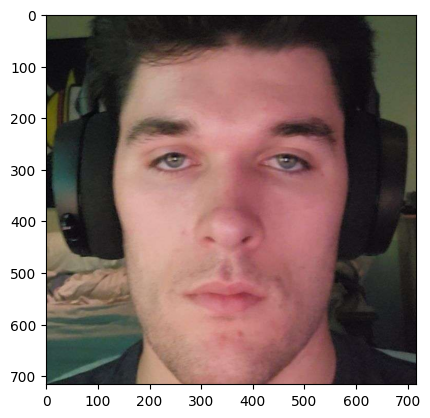

1/1 [==============================] - 0s 31ms/step


array([[17.622011]], dtype=float32)

In [78]:
img_path = "../02_Data/fun_images/will.png"

predict_age(model=model, img_path=img_path)

Image: liang-henry.jpg


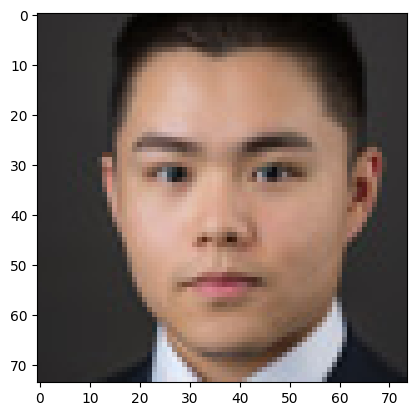

1/1 [==============================] - 0s 37ms/step
Predicted age: [[16.372131]]

Image: baby_sam.png


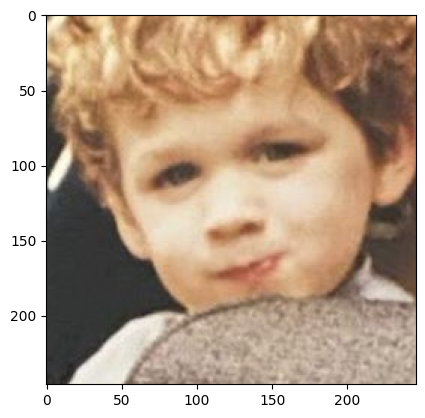

1/1 [==============================] - 0s 37ms/step
Predicted age: [[48.63806]]

Image: vivian6.jpg


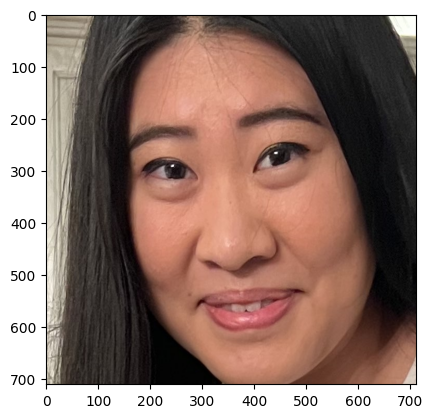

1/1 [==============================] - 0s 33ms/step
Predicted age: [[13.774226]]

Image: nakano-ruben.jpg


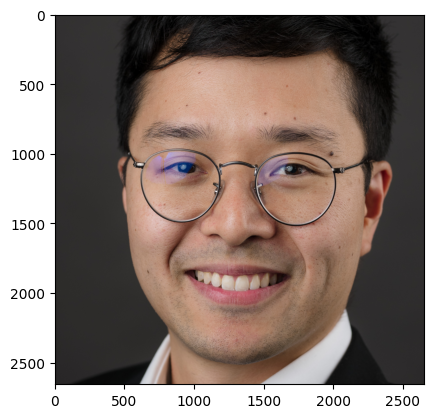

1/1 [==============================] - 0s 34ms/step
Predicted age: [[38.530907]]

Image: sam_swain.jpg


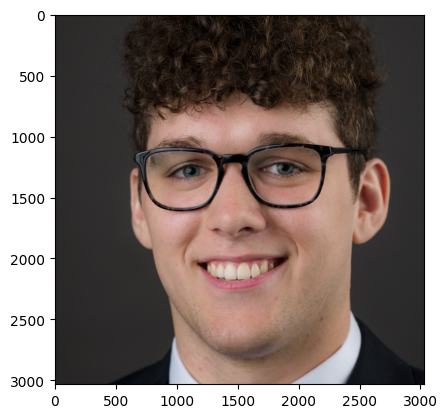

1/1 [==============================] - 0s 34ms/step
Predicted age: [[25.915646]]

Image: cowhey-tommy.jpg


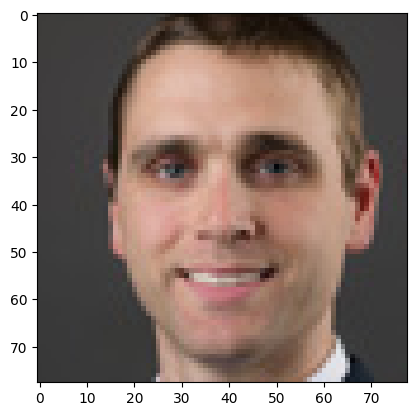

1/1 [==============================] - 0s 35ms/step
Predicted age: [[23.609846]]

Image: paspanthong-bannasorn.jpg


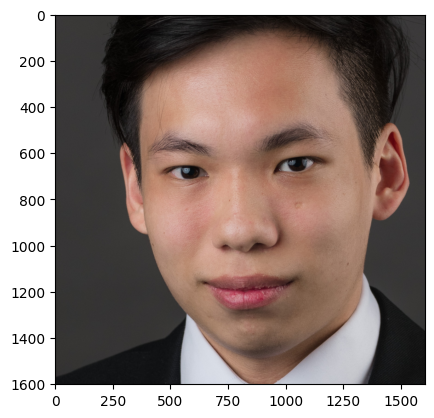

1/1 [==============================] - 0s 33ms/step
Predicted age: [[8.567978]]

Image: lelo_de_larrea_ibarra-alejandra.jpeg


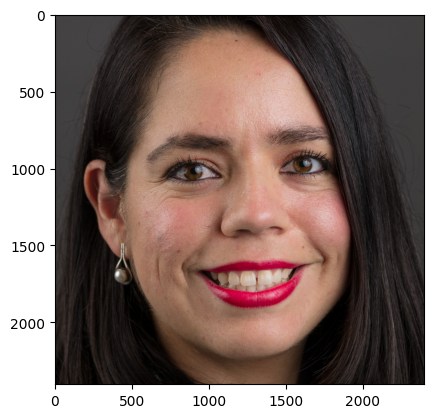

1/1 [==============================] - 0s 32ms/step
Predicted age: [[37.03041]]

Image: vivian5.jpg


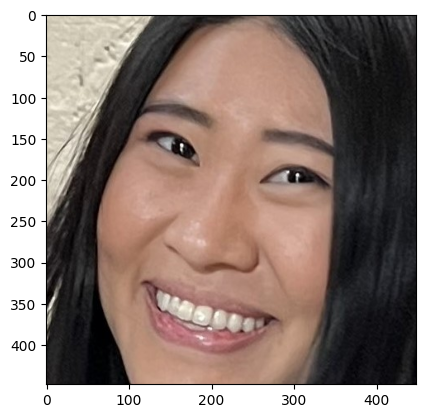

1/1 [==============================] - 0s 34ms/step
Predicted age: [[29.634459]]

Image: vivian.jpg


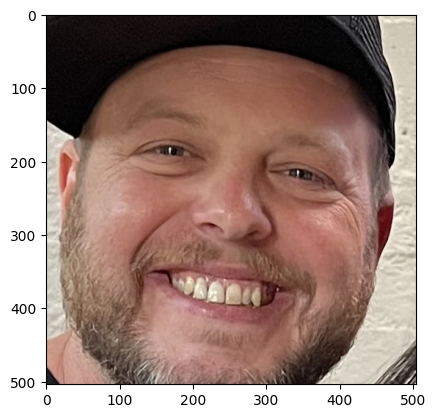

1/1 [==============================] - 0s 32ms/step
Predicted age: [[37.695362]]

Image: will.png


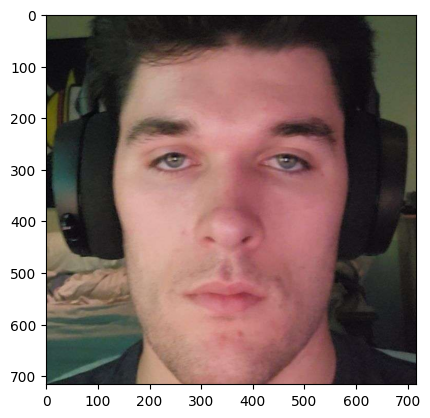

1/1 [==============================] - 0s 38ms/step
Predicted age: [[17.622011]]

Image: vivian2.jpg


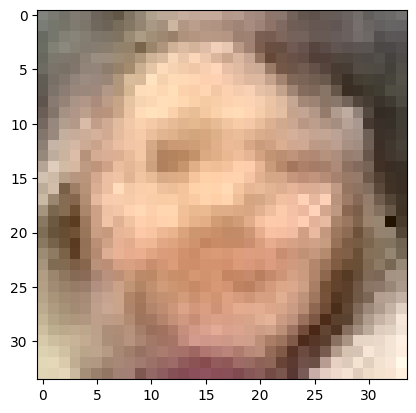

1/1 [==============================] - 0s 31ms/step
Predicted age: [[57.22721]]

Image: vivian3.jpg
No face detected in the image.
Predicted age: None

Image: baby_vivian.png


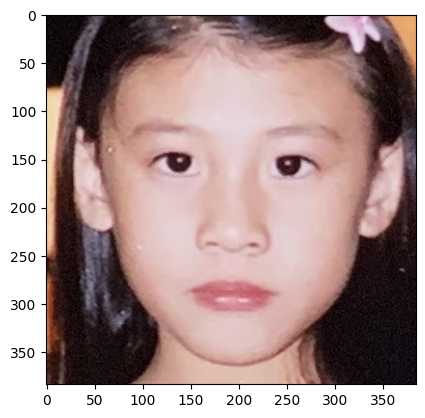

1/1 [==============================] - 0s 30ms/step
Predicted age: [[13.747079]]



In [79]:
# Get the list of all files in the directory
img_dir = "../02_Data/fun_images"
img_files = os.listdir(img_dir)

# Loop through all files
for img_file in img_files:
    # Ensure the file is an image (for example, by checking the file extension)
    if img_file.endswith((".png", ".jpg", ".jpeg")):
        # Create the full image path
        img_path = os.path.join(img_dir, img_file)

        # Predict the age and print the image
        print(f"Image: {img_file}")
        prediction = predict_age(model, img_path)

        # Print the prediction
        print(f"Predicted age: {prediction}\n")